In [65]:
from collections import defaultdict
import numpy as np
import math
import matplotlib.pyplot as plt
rnd = np.random
rnd.seed(4)

class node:
    def __init__(self, x, y, type):
        self.x = x
        self.y = y
        self.type = type
        
class edge:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.cost = ((start.x-end.x)**2+(start.y-end.y)**2)**(1/2)
        
class sol:
    def __init__(self, nodes, edges):
        self.nodes = nodes      #array of nodes in solution
        self.edges = edges      #array of edges in solution
        self.total_cost = get_total_cost(self)
        
    def get_total_cost(self):
        total = 0
        for i in self.edges:
            total = total + i.cost
        return total
    
class partition:
    def __init__(self, G, E):
        self.G = G
        self.E = E


In [66]:
def generateProb(ng, nr, nh):
    G = []
    for i in range(nh):
        G.append(node(rnd.randint(20), rnd.randint(20), 1))
    for i in range(ng):
        G.append(node(rnd.randint(20), rnd.randint(20), 2))
    for i in range(nr):
        G.append(node(rnd.randint(20), rnd.randint(20), 3))
        
    E = [edge(G[i], G[j]) for i in range(ng + nr + nh) for j in range(ng + nr + nh) if i!=j]
    
    prob = partition(G, E)
    
    return prob

In [67]:
def get_part_h(G, E):
    partitions = []
    red = [x for x in G if x.type == 3]
    green = [x for x in G if x.type == 2]
    hosp = [x for x in G if x.type == 1]
    part = []
    for i in hosp:
        part.append(partition([i], []))
    maxr = math.ceil(len(red)/len(hosp))
    maxg = math.ceil(len(green)/len(hosp))
    for i in red:
        d = [x.cost for x in E if x.start==i if x.end.type==1]
        while True:
            idx = np.argmin(d)
            if (len(part[idx].G)) > maxr:
                d[idx] = math.inf
            else:
                part[idx].G.append(i)
                break
    for i in green:
        d = [x.cost for x in E if x.start==i if x.end.type==1]
        while True:
            idx = np.argmin(d)
            if (len(part[idx].G)) > maxr + maxg:
                d[idx] = math.inf
            else:
                part[idx].G.append(i)
                break
    for i in part:
        i.E = [edge(k, l) for k in i.G for l in i.G if k!=l]
    return part

In [68]:
def get_route(G):
    E = []
    red = [x for x in G if x.type == 3]
    green = [x for x in G if x.type == 2]
    depot = [x for x in G if x.type == 1]
    x = depot[0]
    while len(green)>0:
        e = [edge(x, i) for i in green]
        d = [i.cost for i in e]
        idx = np.argmin(d)
        E.append(e[idx])
        x = e[idx].end
        green.remove(x)
    E.append(edge(x, red[0]))
    E.append(edge(red[0], depot[0]))
        
    return E

In [69]:
def assign_in_partition(i):
    
    red = [x for x in i.G if x.type == 3]
    green = [x for x in i.G if x.type == 2]
    depot = [x for x in i.G if x.type == 1][0]
    D = np.empty([len(green), len(red)])
    for i in range(len(green)):
        for j in range(len(red)):
            D[i,j] = edge(depot, green[i]).cost + edge(green[i], red[j]).cost + edge(red[j], depot).cost - edge(depot, red[j]).cost - edge(red[i], depot).cost
    x = np.zeros([len(green), len(red)])
    for i in range(len(green)):
        idx = np.argmin(D[i])
        x[i][idx] = 1
    routes = []
    for i in range(len(red)):
        G = [depot, red[i]]
        a = x[:,i]
        b = a == np.ones(len(a))
        for j in range(len(a)):
            if b[j]:
                G.append(green[j])
        E = get_route(G)
        routes.append(partition(G, E))
    return routes

In [70]:
def heuristic(G, E):
    routes = []
    red = [x for x in G if x.type == 3]
    green = [x for x in G if x.type == 2]
    hosp = [x for x in G if x.type == 1]
    partitions = get_part_h(G, E)
    for i in partitions:
        routes.append(assign_in_partition(i))
    return routes

In [86]:
prob = generateProb(12, 2, 3)
a = heuristic(prob.G, prob.E)

ValueError: attempt to get argmin of an empty sequence

In [82]:
print(a[0][0].E[0].start.x)

9


In [83]:
s0=[(0,3), (3, 9),(9, 0), (0, 2), (2, 5), (5, 7), (7, 0), (0, 6), (6, 4), (4, 8), (8, 1)]
def plotting(sol):
    for i in G:
        if i.type==1:
            plt.scatter(i.x,i.y,c='y')
        elif i.type==2:
             plt.scatter(i.x,i.y,c='g')
        else:
             plt.scatter(i.x,i.y,c='r')

    for i,j in s0:
        plt.plot([G[i].x, G[j].x], [G[i].y,G[j].y],c='b', alpha=0.5)
    for i in range(len(G)):
        plt.annotate((i),(G[i].x+0.1,G[i].y+0.1))
    plt.axis('equal')

In [84]:
def plot_partition(p):
    for i in p.G:
        if i.type == 1:
            plt.scatter(i.x, i.y, c = 'y')
        elif i.type == 2:
            plt.scatter(i.x, i.y, c = 'g')
        else:
            plt.scatter(i.x, i.y, c = 'r')
            
    for k in p.E:
        plt.plot([k.start.x, k.end.x], [k.start.y, k.end.y], c = 'b', alpha = 0.5)
    plt.axis('equal')

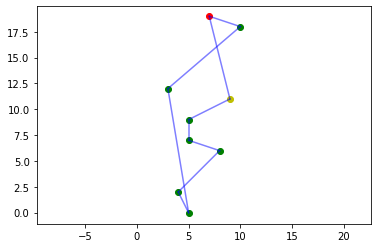

In [85]:
plot_partition(a[0][0])